# 1. Importing Libraries

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

# 2. Data Loading

In [3]:
file_name = "netflix1.csv"
data = pd.read_csv(file_name)
print(data.head())

  show_id     type                             title         director  \
0      s1    Movie              Dick Johnson Is Dead  Kirsten Johnson   
1      s3  TV Show                         Ganglands  Julien Leclercq   
2      s6  TV Show                     Midnight Mass    Mike Flanagan   
3     s14    Movie  Confessions of an Invisible Girl    Bruno Garotti   
4      s8    Movie                           Sankofa     Haile Gerima   

         country date_added  release_year rating  duration  \
0  United States  9/25/2021          2020  PG-13    90 min   
1         France  9/24/2021          2021  TV-MA  1 Season   
2  United States  9/24/2021          2021  TV-MA  1 Season   
3         Brazil  9/22/2021          2021  TV-PG    91 min   
4  United States  9/24/2021          1993  TV-MA   125 min   

                                           listed_in  
0                                      Documentaries  
1  Crime TV Shows, International TV Shows, TV Act...  
2                 TV Dr

# 3. Exploring Data

In [4]:
print("DataFrame Information:")
print(data.info())

DataFrame Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB
None


In [5]:
print("\nFirst few rows of the DataFrame:")
print(data.head())


First few rows of the DataFrame:
  show_id     type                             title         director  \
0      s1    Movie              Dick Johnson Is Dead  Kirsten Johnson   
1      s3  TV Show                         Ganglands  Julien Leclercq   
2      s6  TV Show                     Midnight Mass    Mike Flanagan   
3     s14    Movie  Confessions of an Invisible Girl    Bruno Garotti   
4      s8    Movie                           Sankofa     Haile Gerima   

         country date_added  release_year rating  duration  \
0  United States  9/25/2021          2020  PG-13    90 min   
1         France  9/24/2021          2021  TV-MA  1 Season   
2  United States  9/24/2021          2021  TV-MA  1 Season   
3         Brazil  9/22/2021          2021  TV-PG    91 min   
4  United States  9/24/2021          1993  TV-MA   125 min   

                                           listed_in  
0                                      Documentaries  
1  Crime TV Shows, International TV Shows, T

In [9]:
print("\nStatistical summary of numerical columns:")
print(data.describe())


Statistical summary of numerical columns:
       release_year
count   8790.000000
mean    2014.183163
std        8.825466
min     1925.000000
25%     2013.000000
50%     2017.000000
75%     2019.000000
max     2021.000000


In [10]:
print(data.dtypes) 

show_id         object
type            object
title           object
director        object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
dtype: object


# 4. Data Cleaning

In [11]:
missing_values = data.isnull().sum()
print("Columns with missing values:")
print(missing_values[missing_values > 0])

Columns with missing values:
Series([], dtype: int64)


In [12]:
duplicate_rows = data.duplicated()
num_duplicates = duplicate_rows.sum()
data_cleaned = data[~duplicate_rows].copy()
print(f"Number of duplicate rows: {num_duplicates}")

Number of duplicate rows: 0


In [13]:
print(data.isnull().sum())



show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64


# Total Content on Netflix

In [15]:
movies = data[data['type'] == 'Movie'].shape[0]
tv_shows = data[data['type'] == 'TV Show'].shape[0]

print(f"Total Number Of Movies on Netflix: {movies}")
print(f"Total Number Of TV Shows on Netflix: {tv_shows}")

Total Number Of Movies on Netflix: 6126
Total Number Of TV Shows on Netflix: 2664


#  Top 10 countries with Netflix Content

In [16]:
top_countries = data['country'].value_counts().head(10)
print("Top 10 Countries with Netflix Content:")
print(top_countries)

Top 10 Countries with Netflix Content:
country
United States     3240
India             1057
United Kingdom     638
Pakistan           421
Not Given          287
Canada             271
Japan              259
South Korea        214
France             213
Spain              182
Name: count, dtype: int64


# Monthly Trend of Movie and TV Show Releases

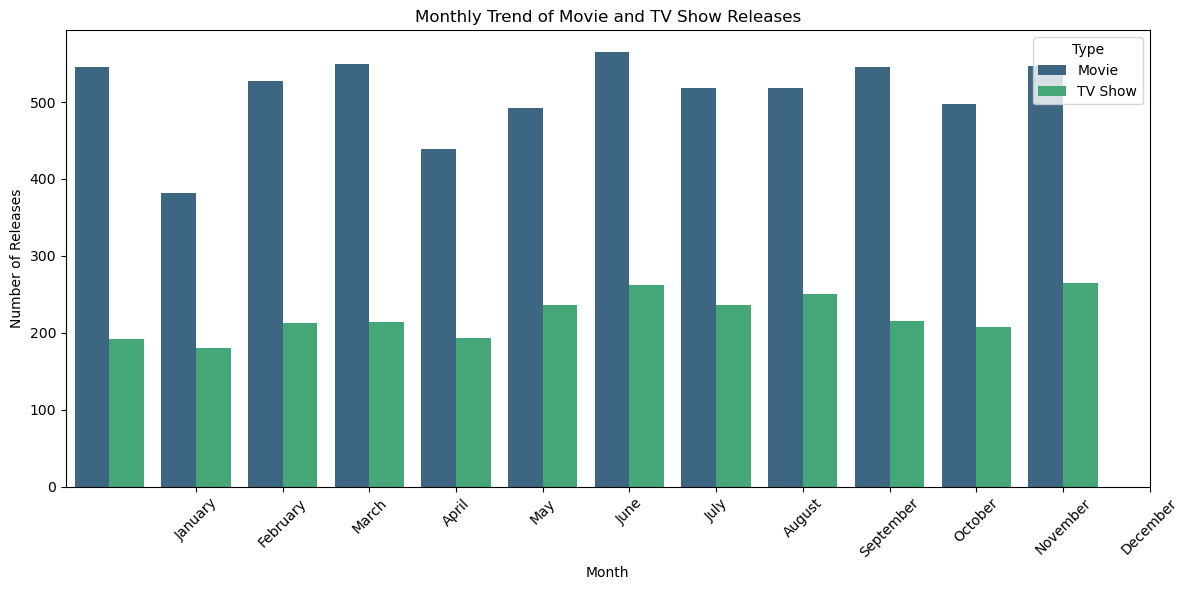

In [17]:
data['date_added'] = pd.to_datetime(data['date_added'])
data['month_added'] = data['date_added'].dt.month
data['year_added'] = data['date_added'].dt.year

movies = data[data['type'] == 'Movie']
tv_shows = data[data['type'] == 'TV Show']
plt.figure(figsize=(12, 6))
sns.countplot(x='month_added', hue='type', data=data, palette='viridis')
plt.title('Monthly Trend of Movie and TV Show Releases')
plt.xlabel('Month')
plt.ylabel('Number of Releases')
plt.xticks(range(1, 13), calendar.month_name[1:13], rotation=45)
plt.legend(title='Type', loc='upper right')
plt.tight_layout()
plt.show()

#  Yearly Trend of Movie and TV Show Releases

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='year_added', hue='type', data=data, palette='viridis')
plt.title('Yearly Trend of Movie and TV Show Releases')
plt.xlabel('Year')
plt.ylabel('Number of Releases')
plt.legend(title='Type', loc='upper right')
plt.tight_layout()
plt.show()

# Top 10 Movies

In [19]:
data['rating'] = pd.to_numeric(data['rating'], errors='coerce')
top_movies = data[data['type'] == 'Movie'].nlargest(10, 'rating')
print(top_movies[['title', 'rating']])

                               title  rating
0               Dick Johnson Is Dead     NaN
3   Confessions of an Invisible Girl     NaN
4                            Sankofa     NaN
6                       The Starling     NaN
7    Motu Patlu in the Game of Zones     NaN
8                       Je Suis Karl     NaN
9           Motu Patlu in Wonderland     NaN
10    Motu Patlu: Deep Sea Adventure     NaN
11          Motu Patlu: Mission Moon     NaN
12                  99 Songs (Tamil)     NaN


# Top 10 TV Show

In [20]:

top_tv_shows = data[data['type'] == 'TV Show'].nlargest(10, 'rating')

print(top_tv_shows[['title', 'rating']])

                                              title  rating
1                                         Ganglands     NaN
2                                     Midnight Mass     NaN
5                     The Great British Baking Show     NaN
17                            Jailbirds New Orleans     NaN
18                  Crime Stories: India Detectives     NaN
20                            True: Magical Friends     NaN
21                           True: Wonderful Wishes     NaN
22                           Dance & Sing with True     NaN
24                                 Bangkok Breaking     NaN
27  Monsters Inside: The 24 Faces of Billy Milligan     NaN


#  Top_10_Directors

In [21]:
director = data['director'].value_counts()
top_10_directors = director.head(10)
print(top_10_directors)

director
Not Given                 2588
Rajiv Chilaka               20
Alastair Fothergill         18
Raúl Campos, Jan Suter      18
Suhas Kadav                 16
Marcus Raboy                16
Jay Karas                   14
Cathy Garcia-Molina         13
Martin Scorsese             12
Youssef Chahine             12
Name: count, dtype: int64
